# ·1.画ROC曲线，计算AUC
# ·2.pipeline的使用
# 3.四种不同打印参数的方式
# 4.采用joblib保存模型
# 5. 对于输入有缺失值的非数值型特征
# 6.画决策树
## 7.使用CountVectorizer和make_column_transformer进行编码
# 8.使用stratify完成训练数据与测试数据的划分
#  9.GridSearchCV or RandomizedGridSearch results
# 10.Pipeline与make_pipe的区别
# 11.用KNN填补空值
# 12.使用OrdinalEncoderrdinal编码

# 画出ROC曲线

In [87]:
import sklearn
print(sklearn.__version__)
#import liabraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

0.23.1


In [183]:
#构建分类器
Lr=LogisticRegression()
Dt=DecisionTreeClassifier()
Rf=RandomForestClassifier()

In [184]:
data=pd.read_csv("./train.csv")
data[["Pclass", "Fare"]].isnull().sum()
X = data[["Pclass", "Fare"]]
y = data["Survived"]

Pclass    0
Fare      0
dtype: int64

LogisticRegression()

DecisionTreeClassifier()

RandomForestClassifier()

[0.97496463] 
 [[-0.69164779  0.00384328]]
[('Pclass', 0.0038432757141334513), ('Fare', 0.0038432757141334513)]


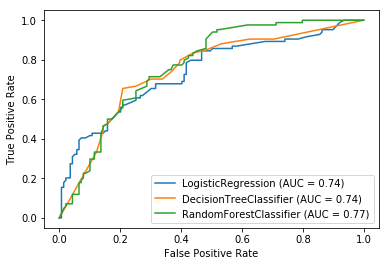

In [185]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#------------------------------------------------------------
# fit and predict
Lr.fit(X_train, y_train)
Dt.fit(X_train, y_train)
Rf.fit(X_train, y_train)
print(Lr.intercept_,'\n',Lr.coef_)
print(list(zip(["Pclass", "Fare"], [Lr.coef_[0][1],Lr.coef_[0][1]])))

disp = plot_roc_curve(Lr,X_test,y_test)
plot_roc_curve(Dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(Rf,X_test,y_test,ax=disp.ax_)

In [143]:
list(zip(["Pclass", "Fare"], [Lr.coef_[0][1],Lr.coef_[0][1]]))

[('Pclass', 0.0038432757141334513), ('Fare', 0.0038432757141334513)]

## plot_confusion_matrix混淆矩阵

The classical confusion matrix


array([[122,  17],
       [ 48,  36]], dtype=int64)

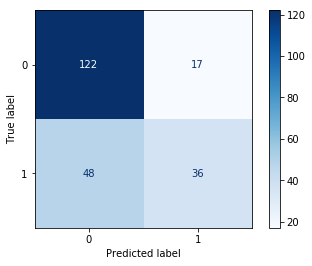

In [186]:
disp = plot_confusion_matrix(Lr, X_test, y_test, cmap = "Blues", values_format = ".3g")

print("The classical confusion matrix")
disp.confusion_matrix

# Feature selection with Pipeline

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile,chi2

In [92]:
X=data["Name"]
y=data["Survived"]

vectorizer=CountVectorizer()
model=LogisticRegression()

pipe = make_pipeline(vectorizer,model)

In [93]:
score = cross_val_score(pipe,X,y,scoring="accuracy").mean()
score

0.7957190383528967

In [94]:
# make the pipeline without feature selection

# keep 50% of features with the best chi-squared scores
selection = SelectPercentile(chi2, percentile = 50)

# add the selection after preprocessing but before model
pipe = make_pipeline(vectorizer, selection, model)
score = cross_val_score(pipe, X, y, scoring = 'accuracy').mean()
print("Score of pipeline with feature selection is {}".format(score))

Score of pipeline with feature selection is 0.8147824995292197


# 四种不同的方式打印参数

In [95]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [96]:
data_cln = data.dropna(axis=0, how="any")
ohe = OneHotEncoder()
model = LogisticRegression()

X = data_cln[["Embarked"]]
y = data_cln[["Survived"]]

pipe2 = Pipeline([("ohe",ohe),
                 ("model",model)])
pipe2.fit(X,y)

print("1 way to show model coefficients")
pipe2.named_steps.model.coef_
print("2 way to show model coefficients")
pipe2.named_steps["model"].coef_
print("3 way to show model coefficients")
pipe2["model"].coef_
print("4 way to show model coefficients")
pipe2[1].coef_

c:\users\jiangtao\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('ohe', OneHotEncoder()), ('model', LogisticRegression())])

1 way to show model coefficients


array([[ 0.33253639, -0.2237774 , -0.10865523]])

2 way to show model coefficients


array([[ 0.33253639, -0.2237774 , -0.10865523]])

3 way to show model coefficients


array([[ 0.33253639, -0.2237774 , -0.10865523]])

4 way to show model coefficients


array([[ 0.33253639, -0.2237774 , -0.10865523]])

In [97]:
data_cln.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 4.采用joblib保存模型

In [98]:
import joblib
# separate X and y
cols_for_x = ["Embarked", "Sex"]
X_train = data_cln[cols_for_x]
y_train = data_cln["Survived"]

test_data=pd.read_csv("./test.csv")
X_test = test_data[cols_for_x]

# instanciate Ohe and make_pipeline
ohe = OneHotEncoder()
model = LogisticRegression()

#------------------------------------------------------------
# create the pipeline
pipe3 = make_pipeline(ohe, model)

#------------------------------------------------------------
# predict_using pipeline
pipe3.fit(X_train, y_train)

#save the model of pipeline
joblib.dump(pipe3,'pipe3.joblib')


Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('logisticregression', LogisticRegression())])

['pipe3.joblib']

In [99]:
new_pipe = joblib.load("pipe3.joblib")
#print("Old pipe.")
#pipe3.predict(X_test)
#print("------------")
#print("new_pipe pipe.")
#new_pipe.predict(X_test)
print("new_pipe pipe result - old pipe result.")
print(new_pipe.predict(X_test)-pipe3.predict(X_test))

new_pipe pipe result - old pipe result.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


# 5. 对于如何填补输入有缺失值的非数值型特征
##### SimpleImputer

In [100]:
from sklearn.impute import SimpleImputer

In [101]:
d = {"Shape_Original":["square", "square", "square", "oval", "circle", np.nan]}
df = pd.DataFrame(d)

#------------------------------------------------------------
# impute values using most frequent
df["most_frequent"] = SimpleImputer(strategy = "most_frequent").fit_transform(df[["Shape_Original"]])

#------------------------------------------------------------
# impute values using most constant
df["constant"]  = SimpleImputer(strategy = "constant", fill_value = "missing").fit_transform(
    df[["Shape_Original"]])

In [102]:
# the result of our imputation
df.style.apply(lambda x: ['background: lightblue' if x.name == 5 else '' for i in x], axis=1)

,Shape_Original,most_frequent,constant
0,square,square,square
1,square,square,square
2,square,square,square
3,oval,oval,oval
4,circle,circle,circle
5,nan,square,missing


# 6.画决策树

c:\users\jiangtao\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


DecisionTreeClassifier()

<Figure size 720x720 with 0 Axes>

[Text(344.89447236180905, 527.6117647058824, 'Sex <= 0.5\ngini = 0.467\nsamples = 137\nvalue = [51, 86]'),
 Text(266.3819095477387, 495.63529411764705, 'Fare <= 7.85\ngini = 0.483\nsamples = 76\nvalue = [45, 31]'),
 Text(243.9497487437186, 463.6588235294118, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(288.8140703517588, 463.6588235294118, 'Fare <= 26.469\ngini = 0.492\nsamples = 71\nvalue = [40, 31]'),
 Text(221.5175879396985, 431.6823529411765, 'Fare <= 26.144\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(199.0854271356784, 399.7058823529412, 'Fare <= 12.675\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(176.6532663316583, 367.7294117647059, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(221.5175879396985, 367.7294117647059, 'Fare <= 25.794\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(199.0854271356784, 335.7529411764706, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(243.9497487437186, 335.7529411764706, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(

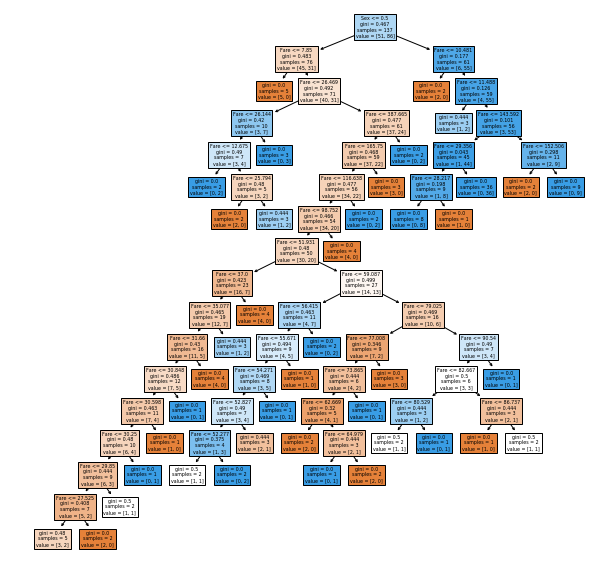

In [116]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
import matplotlib.pyplot as plt

data_cln = data.dropna(axis=0, how="any")
# create our instances
model = DecisionTreeClassifier()

data_cln["Sex"] = data_cln["Sex"].map({'male':0,'female':1})
X=data_cln[["Pclass", "Fare", "Sex"]]
y = data_cln["Survived"]

features = ["Pclass", "Fare", "Sex"]
classes = ["Survived"]

#------------------------------------------------------------
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#------------------------------------------------------------
# fit and predict

model.fit(X_train, y_train)

#------------------------------------------------------------
# plot the tree
plt.figure(figsize=(10,10))
plot_tree(model,feature_names =features,filled = True)

In [117]:
#------------------------------------------------------------
# show the text
# I will plot only the first 200 characters of the tree since it grows rapidly
print(export_text(model, feature_names = features, show_weights=True)[:200])

|--- Sex <= 0.50
|   |--- Fare <= 7.85
|   |   |--- weights: [5.00, 0.00] class: 0
|   |--- Fare >  7.85
|   |   |--- Fare <= 26.47
|   |   |   |--- Fare <= 26.14
|   |   |   |   |--- Fare <= 12.68
| 


# 7.使用CountVectorizer和make_column_transformer进行编码

In [151]:
# import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer


X = data_clnn[["Name", "Cabin"]]

#------------------------------------------------------------
# instanciate CountVectorizer
count_vect = CountVectorizer()

#------------------------------------------------------------
# instanciate CountVectorizer
# You can pass the CountVectorizer multiple times and it will learn
# separate vocabularies.
# to do so, you must use make_column_transformer
ct = make_column_transformer((count_vect, 'Name'), (count_vect, 'Cabin'))
X_transform = ct.fit_transform(X)
X_transform

<183x591 sparse matrix of type '<class 'numpy.int64'>'
	with 1014 stored elements in Compressed Sparse Row format>

In [180]:
X.shape
df_ = pd.DataFrame(X_transform.toarray(),columns=ct.get_feature_names()) # to DataFrame
df_.head(2)

(183, 2)

,countvectorizer-1__achilles,countvectorizer-1__ada,countvectorizer-1__adolf,countvectorizer-1__adrian,countvectorizer-1__agnes,countvectorizer-1__albert,countvectorizer-1__albina,countvectorizer-1__alexander,countvectorizer-1__alexandra,countvectorizer-1__alexenia,...,countvectorizer-2__e67,countvectorizer-2__e68,countvectorizer-2__e77,countvectorizer-2__e8,countvectorizer-2__f2,countvectorizer-2__f33,countvectorizer-2__f4,countvectorizer-2__g6,countvectorizer-2__g63,countvectorizer-2__g73
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 8.使用stratify完成训练数据与测试数据的划分

In [181]:
# generate some data and separate X and y
df = pd.DataFrame({'feature':list(range(8)), 'target':['not fraud']*6 + ['fraud']*2})
X = df[['feature']]
y = df['target']

#------------------------------------------------------------
# train and test without stratify

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1)

print("y_train withous stratify")
y_train
print("y_test withous stratify")
y_test


#------------------------------------------------------------
# train and test with stratify

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify = y, random_state = 1)

print("Notice how using statify preserves the fraud and not fraud percentage.")
print("y_train with stratify")
y_train
print("y_test with stratify")
y_test

y_train withous stratify


0    not fraud
4    not fraud
3    not fraud
5    not fraud
Name: target, dtype: object

y_test withous stratify


7        fraud
2    not fraud
1    not fraud
6        fraud
Name: target, dtype: object

Notice how using statify preserves the fraud and not fraud percentage.
y_train with stratify


1    not fraud
2    not fraud
6        fraud
5    not fraud
Name: target, dtype: object

y_test with stratify


4    not fraud
3    not fraud
7        fraud
0    not fraud
Name: target, dtype: object

# 9. GridSearchCV or RandomizedGridSearch results

In [188]:
from sklearn.model_selection import GridSearchCV

# create our instances
ohe = OneHotEncoder()
vect = CountVectorizer()
ct = make_column_transformer((ohe, ["Sex"]), (vect, "Name"))
model = LogisticRegression(solver = "liblinear", random_state = 1)

#------------------------------------------------------------
# import data
X=data[['Name','Sex','Fare']]
y=data['Survived']

pipe4=make_pipeline(ct,model)

print("Notice the score of our entire pipeline is {}".format
      (cross_val_score(pipe4, X, y, cv = 5, scoring = "accuracy").mean()))

Notice the score of our entire pipeline is 0.8024543343167408


In [196]:
#接下来使用GridSearch
# set the parameters
params = {"columntransformer__countvectorizer__min_df":[1, 2],
         "logisticregression__C":[0.1, 1, 10],
         "logisticregression__penalty":["l1", "l2"]}

grid = GridSearchCV(pipe4, params, cv = 5, scoring = "accuracy")
grid.fit(X, y)

# convert to a pandas DataFrame

results = pd.DataFrame(grid.cv_results_)[["params", "mean_test_score", "rank_test_score"]]
results.sort_values("rank_test_score")

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['Sex']),
                                                                        ('countvectorizer',
                                                                         CountVectorizer(),
                                                                         'Name')])),
                                       ('logisticregression',
                                        LogisticRegression(random_state=1,
                                                           solver='liblinear'))]),
             param_grid={'columntransformer__countvectorizer__min_df': [1, 2],
                         'logisticregression__C': [0.1, 1, 10],
                         

,params,mean_test_score,rank_test_score
2,{'columntransformer__countvectorizer__min_df':...,0.821518,1
8,{'columntransformer__countvectorizer__min_df':...,0.821518,1
4,{'columntransformer__countvectorizer__min_df':...,0.821512,3
5,{'columntransformer__countvectorizer__min_df':...,0.814795,4
11,{'columntransformer__countvectorizer__min_df':...,0.812523,5
9,{'columntransformer__countvectorizer__min_df':...,0.810313,6
3,{'columntransformer__countvectorizer__min_df':...,0.802454,7
10,{'columntransformer__countvectorizer__min_df':...,0.799033,8
0,{'columntransformer__countvectorizer__min_df':...,0.786737,9
1,{'columntransformer__countvectorizer__min_df':...,0.786737,9


In [197]:
results['params'][0]

{'columntransformer__countvectorizer__min_df': 1,
 'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l1'}

### RandomizedGridSearch

In [229]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
import scipy as sp

 # create our instances
vect = CountVectorizer()
model = MultinomialNB()

#------------------------------------------------------------
# make pipeline
pipe5= make_pipeline(vect, model)

# import data
X=data['Name']
y=data['Survived']

# set the params to optimize

params = {}

params["countvectorizer__min_df"] = [1, 2, 3, 4]
params["countvectorizer__lowercase"] = [True, False]
params["multinomialnb__alpha"] = sp.stats.uniform(scale = 1)

# optimize

rand = RandomizedSearchCV(pipe5, params, n_iter = 10, cv = 5, scoring = "accuracy", random_state = 1)
rand.fit(X, y)

#------------------------------------------------------------
# best score and params

print("Best score achieved with our search is:")
rand.best_score_

print("Best params are:")
rand.best_params_

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('countvectorizer',
                                              CountVectorizer()),
                                             ('multinomialnb',
                                              MultinomialNB())]),
                   param_distributions={'countvectorizer__lowercase': [True,
                                                                       False],
                                        'countvectorizer__min_df': [1, 2, 3, 4],
                                        'multinomialnb__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000237F80199B0>},
                   random_state=1, scoring='accuracy')

Best score achieved with our search is:


0.8080534806352395

Best params are:


{'countvectorizer__lowercase': False,
 'countvectorizer__min_df': 3,
 'multinomialnb__alpha': 0.1981014890848788}

# 10.Pipeline与makepipe的区别

In [236]:
from sklearn.compose import make_column_transformer, ColumnTransformer

# create each instance
ohe = OneHotEncoder()
si = SimpleImputer()
model = LogisticRegression()

#------------------------------------------------------------
# import data
# select columns to transform
X = data[["Fare", "Embarked", "Sex", "Age"]].head()
X["Age"].iloc[0] = np.nan # create a missing values
X.head()

y = data[["Survived"]].head()

#------------------------------------------------------------
# use make_pipeline

column_transformer = make_column_transformer((ohe, ["Embarked", "Sex"]),
                                             (si, ["Age"]),remainder = "passthrough")

pipeline = make_pipeline(column_transformer, model)

pipeline.fit(X, y)

#------------------------------------------------------------
# use Pipeline
# The main difference is that we must name each step

column_transformer2 = ColumnTransformer([("encoder", ohe, ["Embarked", "Sex"]),
                                        # notice how we must name each step
                                        ("imputer", si, ["Age"])],remainder = "passthrough")

pipeline = Pipeline([("preprocessing", column_transformer),   #column_transformer2也行
                     ("model", model)]) # notice how we must name each step
pipeline.fit(X, y)

,Fare,Embarked,Sex,Age
0,7.2500,S,male,NaN
1,71.2833,C,female,38.0
2,7.9250,S,female,26.0
3,53.1000,S,female,35.0
4,8.0500,S,male,35.0


c:\users\jiangtao\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Embarked', 'Sex']),
                                                 ('simpleimputer',
                                                  SimpleImputer(), ['Age'])])),
                ('logisticregression', LogisticRegression())])

c:\users\jiangtao\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Embarked', 'Sex']),
                                                 ('simpleimputer',
                                                  SimpleImputer(), ['Age'])])),
                ('model', LogisticRegression())])

# 11.用KNN填补空值

In [238]:
# let's see KNNInputer in action
from sklearn.impute import KNNImputer
knn_inputer = KNNImputer()

X = data[["SibSp", "Fare", "Age"]]
nan_index = X[X["Age"].isnull()].index

print("Data with nans")
X[X.index.isin(nan_index)].head()

print("Transformed data with no nans, and the values are based on the NN.")
X_transformed = pd.DataFrame(knn_inputer.fit_transform(X), 
                             columns = ["SibSp", "Fare", "Age"], index = X.index)
X_transformed[X.index.isin(nan_index)].head()

Data with nans


,SibSp,Fare,Age
5,0,8.4583,NaN
17,0,13.0000,NaN
19,0,7.2250,NaN
26,0,7.2250,NaN
28,0,7.8792,NaN


Transformed data with no nans, and the values are based on the NN.


,SibSp,Fare,Age
5,0.0,8.4583,22.684
17,0.0,13.0000,24.600
19,0.0,7.2250,26.400
26,0.0,7.2250,26.400
28,0.0,7.8792,29.400


# 12.使用OrdinalEncoderrdinal编码

In [239]:
# create a df
d = {
"Shape":["square", "square", "oval", "circle"],
"Class":["third", "first", "second", "third"],
"Size":["S", "S", "L", "XL"]
}

df = pd.DataFrame(d)
df

#------------------------------------------------------------
# import the libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#------------------------------------------------------------
# transform data using OneHotEncoder
print("Transform categorical data using OneHotEncoder")
ohe = OneHotEncoder(sparse = False) # if you don't put false, you will get a sparse matrix object
shaped_transformed = ohe.fit_transform(df[["Shape"]]) # if you pass as a series, you will need to reshape the data. Notice the double square bracket
shaped_transformed

#------------------------------------------------------------
# transform data using OrdinalEncoder
print("Transform categorical data using OrdinalEncoder")
print("When using OrdinalEncoder, your data has to have a order: like first class, second class, third class")
oe = OrdinalEncoder(categories = [["first", "second", "third"], # order for the column Class
                                  ["S", "M", "L", "XL"]]) # order for the column Size
categorical_ordinal_transformed = oe.fit_transform(df[["Class", "Size"]])
categorical_ordinal_transformed

,Shape,Class,Size
0,square,third,S
1,square,first,S
2,oval,second,L
3,circle,third,XL


Transform categorical data using OneHotEncoder


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

Transform categorical data using OrdinalEncoder
When using OrdinalEncoder, your data has to have a order: like first class, second class, third class


array([[2., 0.],
       [0., 0.],
       [1., 2.],
       [2., 3.]])

### 7种对列操作的方法

In [241]:

#------------------------------------------------------------
# select columns to transform
X = data[["Fare", "Embarked", "Sex", "Age"]].head()

#------------------------------------------------------------
# import the libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

#------------------------------------------------------------
# instanciate the classes
ohe = OneHotEncoder()

#------------------------------------------------------------
# create the pipeline and select the columns by name

print("Select the column by name")

ct = make_column_transformer(
(ohe, ["Embarked", "Sex"])# if you have null values it will give and error. You must first fill those values before doing an ohe
)

# fit_transform the columns
X_transformed = ct.fit_transform(X) 
X_transformed

#------------------------------------------------------------
# create the pipeline and select the columns by position

print("Select the column by position")

ct = make_column_transformer(
(ohe, [1, 2])# if you have null values it will give and error. You must first fill those values before doing an ohe
)

# fit_transform the columns
X_transformed = ct.fit_transform(X) 
X_transformed

#------------------------------------------------------------
# create the pipeline and select the columns using slice

print("Select the column using slice")

ct = make_column_transformer(
(ohe, slice(1, 3))# if you have null values it will give and error. You must first fill those values before doing an ohe
)

# fit_transform the columns
X_transformed = ct.fit_transform(X) 
X_transformed

#------------------------------------------------------------
# create the pipeline and select the columns using a boolean mask

print("Select the column using a boolean mask")

ct = make_column_transformer(
(ohe, [False, True, True, False])# if you have null values it will give and error. You must first fill those values before doing an ohe
)

# fit_transform the columns
X_transformed = ct.fit_transform(X) 
X_transformed

#------------------------------------------------------------
# create the pipeline and select the columns using make_column_selector and regex

print("Select the column using using make_column_selector and regex. New in pandas 0.22")

ct = make_column_transformer(
(ohe, make_column_selector(pattern = "E|S"))# if you have null values it will give and error. You must first fill those values before doing an ohe
)

# fit_transform the columns
X_transformed = ct.fit_transform(X) 
X_transformed

#------------------------------------------------------------
# create the pipeline and select the columns using make_column_selector and dtype_include

print("Select the column using using make_column_selector and dtype_include. New in pandas 0.22")

ct = make_column_transformer(
(ohe, make_column_selector(dtype_include = object))# if you have null values it will give and error. You must first fill those values before doing an ohe
)

# fit_transform the columns
X_transformed = ct.fit_transform(X) 
X_transformed

#------------------------------------------------------------
# create the pipeline and select the columns using make_column_selector and dtype_exclude

print("Select the column using using make_column_selector and dtype_exclude. New in pandas 0.22")

ct = make_column_transformer(
(ohe, make_column_selector(dtype_exclude = "number"))# if you have null values it will give and error. You must first fill those values before doing an ohe
)

# fit_transform the columns
X_transformed = ct.fit_transform(X) 
X_transformed

Select the column by name


array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.]])

Select the column by position


array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.]])

Select the column using slice


array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.]])

Select the column using a boolean mask


array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.]])

Select the column using using make_column_selector and regex. New in pandas 0.22


array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.]])

Select the column using using make_column_selector and dtype_include. New in pandas 0.22


array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.]])

Select the column using using make_column_selector and dtype_exclude. New in pandas 0.22


array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.]])